# VGG-16 and CNN on Animals dataset
This is just for testing purpose.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path
from tqdm import tqdm
import cv2 as cv
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import ImageDataGenerator

# Data Load

In [2]:
base_dir=r"C:\Users\my pc\Desktop\Computer Vision practice\Animals"
categories=[]
for c in os.listdir(base_dir):
    categories.append(c)
print(categories)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


In [3]:
base_data = []
for c in categories:
    path = os.path.join(base_dir,c)
    class_num = categories.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path,img))
        base_data.append([img_arr, class_num])
print(len(base_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 410.53it/s]

170


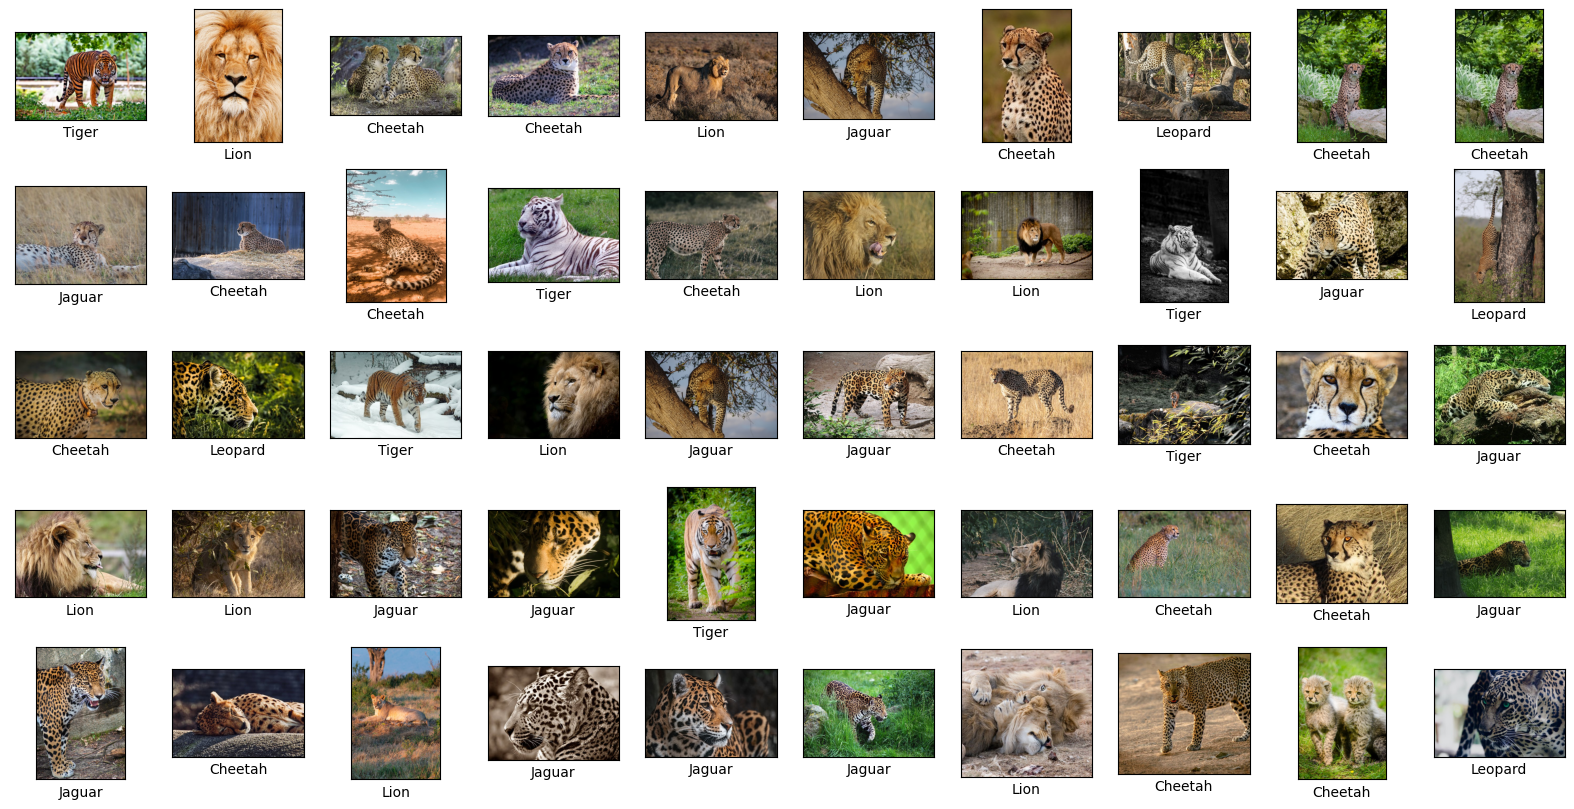

In [17]:
random.shuffle(base_data)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    image = base_data[i][0]
    image_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)  
    plt.imshow(image_color,cmap='gray')
    plt.xlabel(categories[base_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

(750, 500, 3)

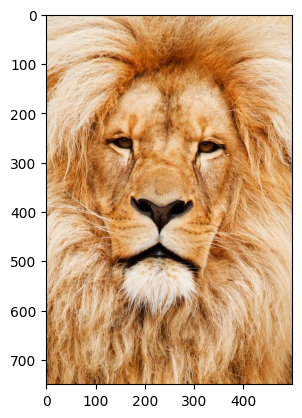

In [20]:
x = base_data[1][0]
image = cv.cvtColor(x, cv.COLOR_BGR2RGB)
plt.imshow(image)
x.shape

# Model Building

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

data = []
labels = []

for img, class_num in base_data:
    img = cv.resize(img, (224, 224))
    img = img / 255.0
    data.append(img)
    labels.append(class_num)

data = np.array(data, dtype="float32")
labels = np.array(labels)
num_classes = 5

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Set the number of output units to num_classes

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
5/5 [==============================] - 2s 271ms/step - loss: 1.6221 - accuracy: 0.2279 - val_loss: 1.6250 - val_accuracy: 0.2059
Epoch 2/20
5/5 [==============================] - 1s 238ms/step - loss: 1.6016 - accuracy: 0.2426 - val_loss: 1.6190 - val_accuracy: 0.2059
Epoch 3/20
5/5 [==============================] - 1s 237ms/step - loss: 1.5995 - accuracy: 0.2279 - val_loss: 1.6611 - val_accuracy: 0.2353
Epoch 4/20
5/5 [==============================] - 1s 238ms/step - loss: 1.5911 - accuracy: 0.2868 - val_loss: 1.7640 - val_accuracy: 0.0882
Epoch 5/20
5/5 [==============================] - 1s 237ms/step - loss: 1.6056 - accuracy: 0.2647 - val_loss: 1.6567 - val_accuracy: 0.0882
Epoch 6/20
5/5 [==============================] - 1s 237ms/step - loss: 1.5938 - accuracy: 0.2647 - val_loss: 1.6330 - val_accuracy: 0.0882
Epoch 7/20
5/5 [==============================] - 1s 237ms/step - loss: 1.5969 - accuracy: 0.2647 - val_loss: 1.6416 - val_accuracy: 0.0882
Epoch 8/20
5/5 [====

In [35]:
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

2/2 [==============================] - 0s 14ms/step - loss: 1.6972 - accuracy: 0.2059
Test Loss: 1.6971838474273682, Test Accuracy: 0.20588235557079315


In [36]:
confusion = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(confusion)
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)

Confusion Matrix:
[[1 1 0 0 5]
 [0 2 1 2 4]
 [0 2 0 0 5]
 [2 1 0 1 4]
 [0 0 0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.33      0.22      0.27         9
           2       0.00      0.00      0.00         7
           3       0.33      0.12      0.18         8
           4       0.14      1.00      0.25         3

    accuracy                           0.21        34
   macro avg       0.23      0.30      0.18        34
weighted avg       0.25      0.21      0.18        34



# CNN model

In [37]:
from tensorflow.keras.layers import Dropout
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
5/5 [==============================] - 1s 58ms/step - loss: 1.7342 - accuracy: 0.2206 - val_loss: 1.5657 - val_accuracy: 0.2059
Epoch 2/20
5/5 [==============================] - 0s 38ms/step - loss: 1.5991 - accuracy: 0.2647 - val_loss: 1.6372 - val_accuracy: 0.2059
Epoch 3/20
5/5 [==============================] - 0s 37ms/step - loss: 1.5389 - accuracy: 0.3235 - val_loss: 1.7135 - val_accuracy: 0.0882
Epoch 4/20
5/5 [==============================] - 0s 39ms/step - loss: 1.5003 - accuracy: 0.3456 - val_loss: 1.6536 - val_accuracy: 0.0882
Epoch 5/20
5/5 [==============================] - 0s 38ms/step - loss: 1.3809 - accuracy: 0.4706 - val_loss: 1.6217 - val_accuracy: 0.1471
Epoch 6/20
5/5 [==============================] - 0s 39ms/step - loss: 1.3658 - accuracy: 0.5074 - val_loss: 1.6175 - val_accuracy: 0.1765
Epoch 7/20
5/5 [==============================] - 0s 37ms/step - loss: 1.2570 - accuracy: 0.4926 - val_loss: 1.6245 - val_accuracy: 0.2059
Epoch 8/20
5/5 [===========

In [38]:
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

2/2 [==============================] - 0s 24ms/step - loss: 1.4691 - accuracy: 0.5000
Test Loss: 1.4690899848937988, Test Accuracy: 0.5


# Confusion and Classification Report

In [39]:
confusion = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(confusion)
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)

Confusion Matrix:
[[6 0 1 0 0]
 [2 4 1 1 1]
 [4 1 0 1 1]
 [1 1 0 6 0]
 [0 1 1 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       0.57      0.44      0.50         9
           2       0.00      0.00      0.00         7
           3       0.75      0.75      0.75         8
           4       0.33      0.33      0.33         3

    accuracy                           0.50        34
   macro avg       0.42      0.48      0.44        34
weighted avg       0.45      0.50      0.46        34

